# Car Price Prediction using Linear Regression

Last Modified : Jul 2018

Created by : Mamta Venugopal

Problem Statement: A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

Essentially, the company wants to know: a)Which variables are significant in predicting the price of a car b)How well those variables describe the price of a car

To know the accuracy of the model, i.e. how well these variables can predict price of a car.

### The solution is divided into the following sections:

a) Data understanding and exploration

b) Data cleaning

c) Data preparation

d) Model building and evaluation

#### 1.Data understanding and exploration


In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression



In [177]:
# Directory definition
import os
os.getcwd()
os.chdir(r'C:\Users\lenovo\Documents\PreparatoryPython\Machine_Learning\Assignment')
os.getcwd()

'C:\\Users\\lenovo\\Documents\\PreparatoryPython\\Machine_Learning\\Assignment'

In [178]:
# Importing carprice assignment
cars = pd.read_csv(r"CarPrice_Assignment.csv")
cars.columns = cars.columns.str.strip() #Striping all the white spaces from the columns of carprice assignment
cars.columns=cars.columns.str.lower() #Convert all the column heads os that it can be easily accessible.
print(cars.shape) #No of row is 205 and columns is 26

(205, 26)


In [179]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_id              205 non-null int64
symboling           205 non-null int64
carname             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [180]:
cars.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### 2.Understanding the Data Dictionary
The data dictionary contains the meaning of various attributes; some non-obvious ones are:

Car price is ranging from $5,118 to $45,400. 
When the mean and median for car price are compared, it looks like it is different implying that there might be outliers in this series. But in this context it is not true. The price of car could vary since there are luxury cars available in the market.

In [181]:
#understanding the categorical variables
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()



 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [182]:
# aspiration: An (internal combustion) engine property showing 
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [183]:
# drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

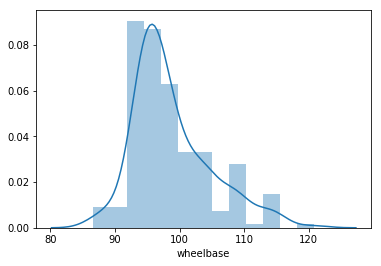

In [184]:
#univariate analysis of numeric variables
# wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

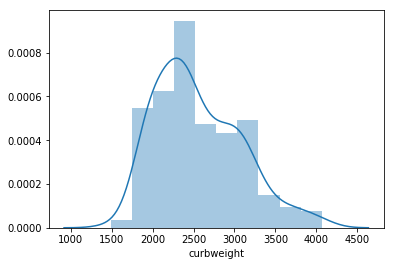

In [185]:
# curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

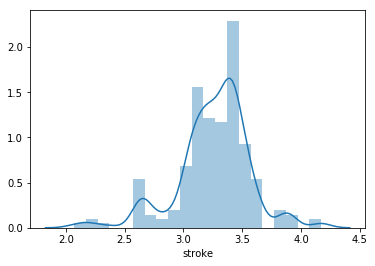

In [186]:
# stroke: volume of the engine (the distance traveled by the piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()

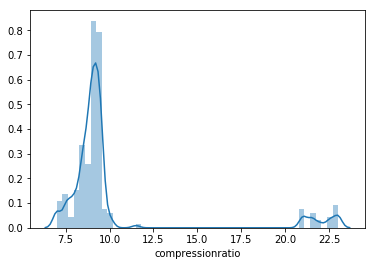

In [187]:
# compression ration: ratio of volume of fuel compressed before ignition 
# at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()

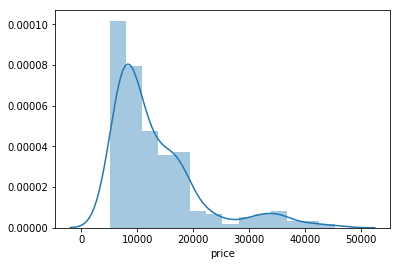

In [188]:
#target_variable is the car price
sns.distplot(cars['price'])

Bivariate Analysis

In [189]:
# all numeric (float and int) variables in the dataset
numvars_data = cars.select_dtypes(include=['float64', 'int64'])
numvars_data.head()

,car_id,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Linear regression can be done if there is a linear relationship between the target variable and the other input variables. We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

'symboling' and 'car_id' have no value addition. so these variables are dropped.

In [190]:
numvars_data=numvars_data.drop(['symboling','car_id'],axis=1)
numvars_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


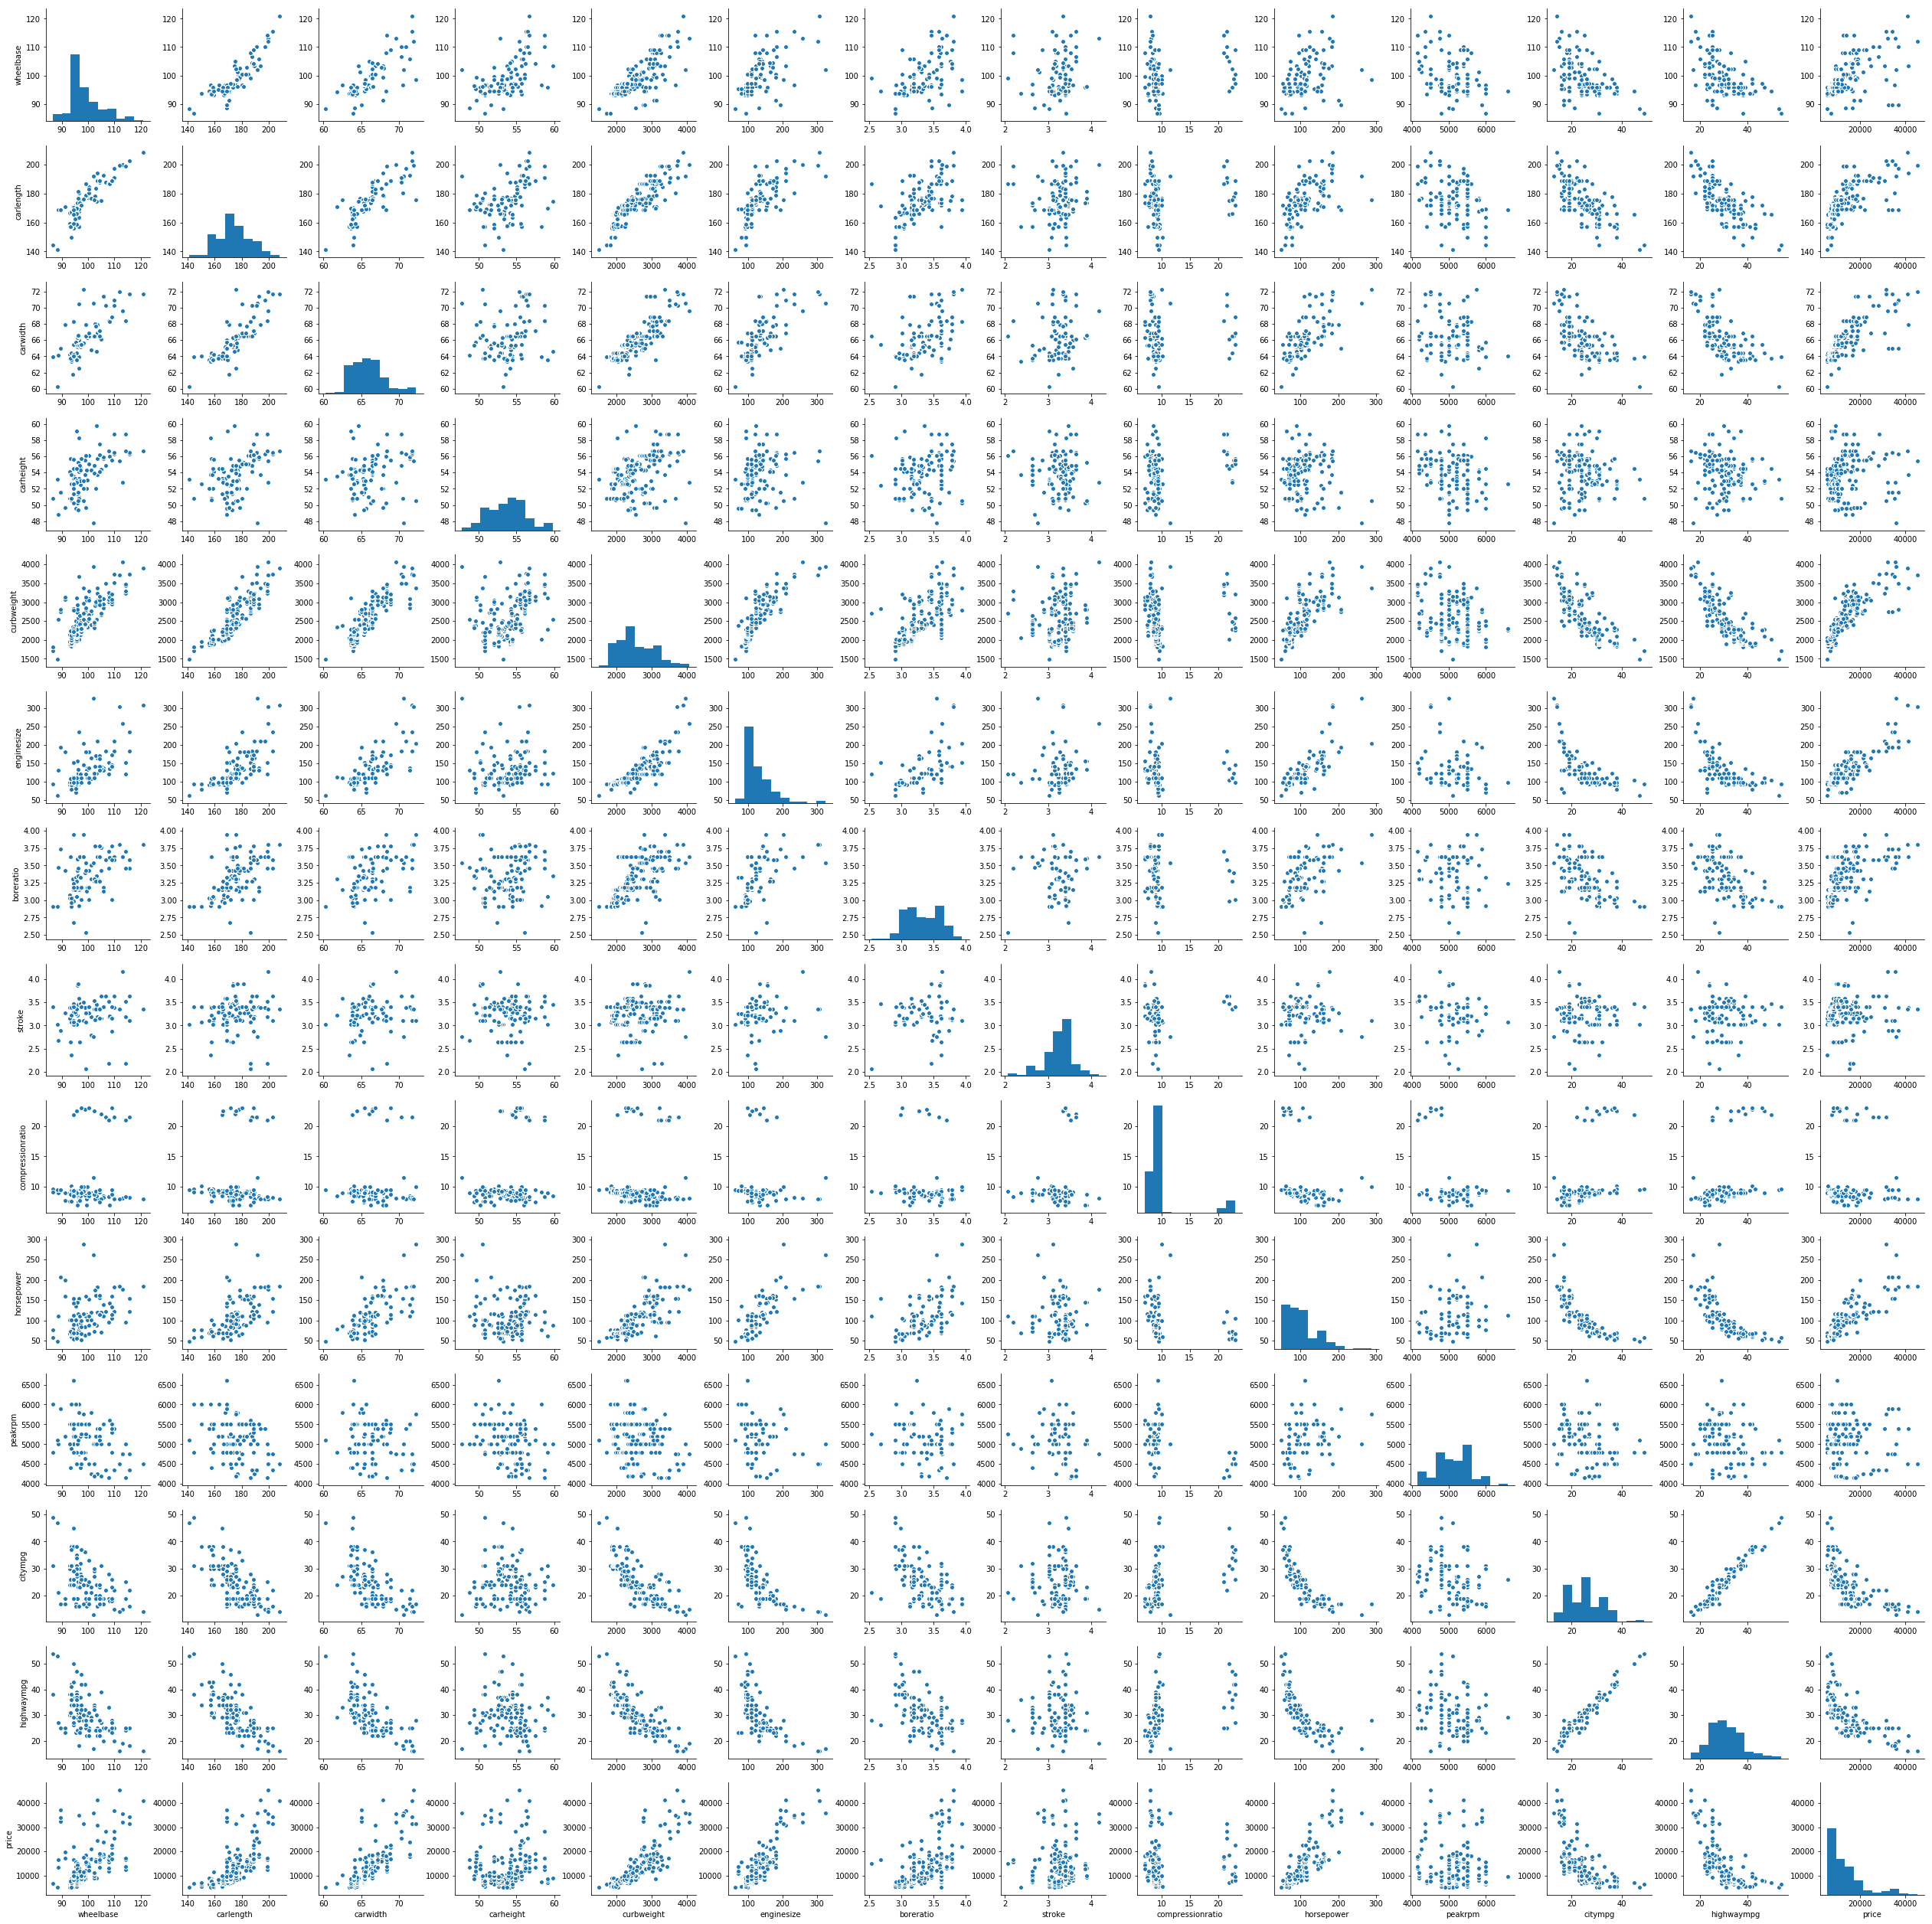

In [191]:
# pairwise scatter plot
plt.figure(figsize=(20,10))
sns.pairplot(numvars_data)
plt.show()

Heatmap

In [192]:
# correlation matrix
cor = numvars_data.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


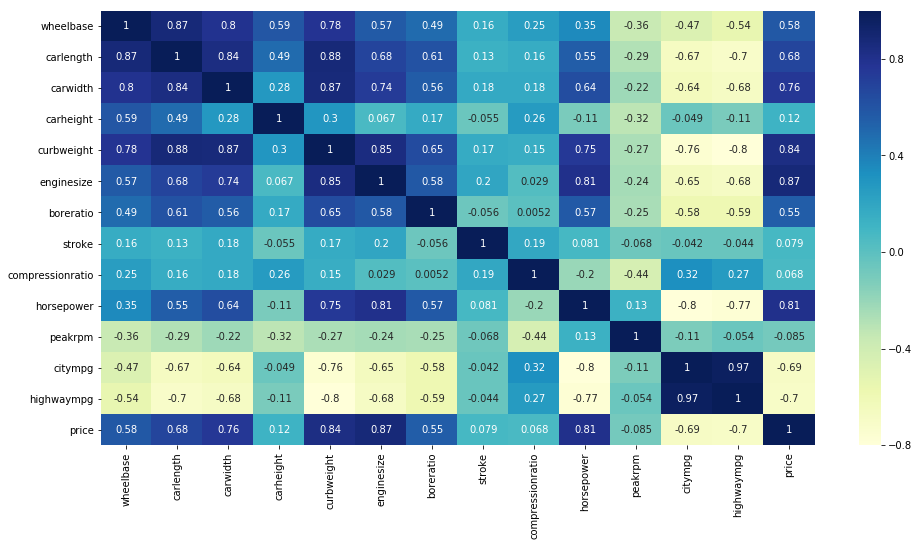

In [193]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


Observations:

Correlation of price with independent variables:

Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:

Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated
Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

#### Data Cleaning

Let's now conduct some data cleaning steps.

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except symboling, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it can be used in the model as a numeric variable also.

In [194]:
# Names of the car are retreived from this carname series using split function and the first string gives the car name. Car model has been ignored.
cars['carname']=cars.carname.str.split(' ',1).str[0]
cars['carname']=cars['carname'].str.title()


In [195]:
#The following are name of the models with their true spellings: alfa-romero, audi, bmw, chevrolet, dodge, honda, 
#isuzu, jaguar, mazda, mercedes-benz, mercury, 
#mitsubishi, nissan, peugot, plymouth, porsche, 
#renault, saab, subaru, toyota, volkswagen, volvo.
#Following code is written to correct the spelling mistakes in the car name.
cars['carname']=cars['carname'].str.replace('Toyouta','Toyota')
cars['carname']=cars['carname'].str.replace('Vokswagen','Volkswagen')
cars['carname']=cars['carname'].str.replace('Vw','Volkswagen')
cars['carname']=cars['carname'].str.replace('Maxda','Mazda')
cars['carname']=cars['carname'].str.replace('Porcshce','Porsche')
cars['carname']=cars['carname'].str.replace('Peugeot','Peugot')
cars['carname'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Honda          13
Mitsubishi     13
Subaru         12
Volkswagen     12
Peugot         11
Volvo          11
Dodge           9
Bmw             8
Buick           8
Plymouth        7
Audi            7
Saab            6
Porsche         5
Isuzu           4
Chevrolet       3
Jaguar          3
Alfa-Romero     3
Renault         2
Mercury         1
Name: carname, dtype: int64

In [196]:
#Symboling is categorical variable and which  indicates that the auto is more risky than its price. +3 means it is highly risky and -2 means it is safe.
#At first, it looks like ordinal variable but on plotting the graphs for symboling vs price it shows that price is independent of symboling. Risky car as well as safe cars are priced highly.
cars['symboling']=cars['symboling'].astype('object')

In [197]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_id              205 non-null int64
symboling           205 non-null object
carname             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

In [198]:
# outliers
cars.describe()

,car_id,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [199]:
#Variable known as volume has been created that shows how much of volume will the car have if it had certain height,length and width
cars['volume']=cars['carlength']*cars['carwidth']*cars['carheight']
cars['lengthtowidth']=cars['carlength']/cars['carwidth']
#Variable widthtolength ratio has been created. It has been observed that for every car width there is are different car length.
#This variable is created to understand the impact of carwidth on price of the car.
cars['widthtolength']=cars['carwidth']/cars['carlength']
#Variable wheelbasetowidth is created to measure the wheelbase to trackwidth. Higher the wheelbase means less maneuverability.
cars['wheelbasetowidth']=cars['wheelbase']/cars['carwidth']
#Variable wheelbasetolength is created to measure the wheelbase to length. This is to understand if it affects the price
cars['wheelbasetolength']=cars['wheelbase']/cars['carlength']
#additional ratios are created to understand where it depends on the price.
cars['widthtoheight']=cars['carwidth']/cars['carheight']
cars['heighttolength']=cars['carheight']/cars['carlength']


In [200]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = cars.select_dtypes(include=['object'])
cars_categorical.head()


,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,Alfa-Romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,Alfa-Romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,Alfa-Romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,Audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,Audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [201]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carname_Audi,carname_Bmw,carname_Buick,carname_Chevrolet,carname_Dodge,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [202]:
#Creating X and y variables 
# concat dummy variables with X
X = pd.concat([numvars_data, cars_dummies], axis=1)
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [203]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
symboling_-1             205 non-null uint8
symboling_0              205 non-null uint8
symboling_1              205 non-null uint8
symboling_2              205 non-null uint8
symboling_3              205 non-null uint8
carname_Audi             205 non-null uint8

In [204]:
# drop categorical variables 
X = X.drop(['price'], axis=1)
y = cars['price']

In [205]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X=pd.DataFrame(scale(X))
X.columns=cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'carname_Audi',
       'carname_Bmw', 'carname_Buick', 'carname_Chevrolet', 'carname_Dodge',
       'carname_Honda', 'carname_Isuzu', 'carname_Jaguar', 'carname_Mazda',
       'carname_Mercury', 'carname_Mitsubishi', 'carname_Nissan',
       'carname_Peugot', 'carname_Plymouth', 'carname_Porsche',
       'carname_Renault', 'carname_Saab', 'carname_Subaru', 'carname_Toyota',
       'carname_Volkswagen', 'carname_Volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_o

In [206]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

3. Model Building and Evaluation¶

In [207]:
# Building the first model with all the features

# instantiate
lm = LinearRegression()
# fit
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
# print coefficients and intercept

print(lm.coef_)
print(lm.intercept_)

[ 1.28804792e+03 -1.04955210e+03  1.68834559e+03 -1.25904071e+03
  2.42027090e+03  1.16263350e+04 -4.85038954e+03 -1.13424087e+03
 -2.56951960e+03 -9.73644812e+02  1.35681433e+03 -2.61818510e+02
  7.44239551e+02  7.36334360e+02  8.01800617e+02  7.02360200e+02
  6.47750839e+02  3.50558608e+02  5.21573928e+02  2.39504091e+03
  3.76793525e+02 -1.83326364e+02 -6.98406228e+02 -5.19749514e+02
  6.03320099e+01 -4.92211850e+02  3.10813552e+02 -3.63797881e-12
 -1.05964701e+03  3.61145168e+02 -4.85552717e+02 -6.84202629e+02
  1.44392978e+03 -3.47875979e+01  1.33285633e+03  4.08594288e+02
  2.66978488e+02  2.56635369e+02  9.97453681e+02 -1.20683560e+03
  1.01248452e+03 -2.33385958e+02 -7.69280387e+02 -1.83640992e+03
 -1.66162816e+03 -9.12566337e+02 -9.28943930e+01  4.42816604e+02
  1.15665864e+03  5.50557360e+02  6.45972107e+01  1.55937229e+02
  9.01690070e+02 -2.89587453e+02  2.03544173e+03  2.20137145e+03
  6.79103088e+03  1.39274072e+03  1.78808440e+03 -1.04955642e+03
  2.03544173e+03  4.50875

In [209]:
# predict 
y_pred = lm.predict(X_test)
# metrics
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))


0.8382621393399069


In [173]:
import statsmodels.api as sm 
# fitting the model with all variables
lm = sm.OLS(y_train, X_train).fit()

In [174]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     53.29
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           9.90e-47
Time:                        05:39:35   Log-Likelihood:                -1218.3
No. Observations:                 143   AIC:                             2561.
Df Residuals:                      81   BIC:                             2744.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
wheelbase              1288.04

Model Building Using RFE
Let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features, and then use the statsmodels library to build models using the shortlisted features (this is also because sklearn doesn't have adjusted r-squared, statsmodels has).

In [138]:
# RFE with 15 features
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe_15 = RFE(lm, 15)

# fit with 15 features
rfe_15.fit(X_train, y_train)

# Printing the boolean results
print(rfe_15.support_)           
print(rfe_15.ranking_)  

[False False  True False  True  True  True  True False False False False
 False False False False False False False  True False False False False
 False False False False False False  True False  True False False False
 False False False False False False False False False False False False
  True False False False False False  True  True  True False  True  True
  True False False False False False False False]
[ 4  5  1  7  1  1  1  1  9 35 13 45 22 25 27 28 26 29 36  1 39 30 15 21
 49 34 42 52  3 40  1 16  1 51  8 31 43 41 12 10  2 37 19  6 17 18 47 23
  1 33 46 24 20 38  1  1  1 32  1  1  1 14 44 11 54 48 50 53]


In [139]:
# making predictions using rfe model
y_pred = rfe_15.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8941491916479422


In [211]:
# RFE with 6 features
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe_6 = RFE(lm, 6)

# fit with 15 features
rfe_6.fit(X_train, y_train)

# Printing the boolean results
print(rfe_6.support_)           
print(rfe_6.ranking_)  
# making predictions using rfe model
y_pred = rfe_6.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

[False False  True False  True  True False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False]
[13 14  1 16  1  1  2  4 18 44 22 54 31 34 36 37 35 38 45  1 48 39 24 30
 58 43 51 61 12 49 10 25  1 60 17 40 52 50 21 19 11 46 28 15 26 27 56 32
  1 42 55 33 29 47  3  5  7 41  9  8  6 23 53 20 63 57 59 62]
0.8851422877312572


Note that RFE with 6 features is giving about 88% r-squared, compared to 89% with 15 features. Should we then choose more features for slightly better performance?

A better metric to look at is adjusted r-squared, which penalises a model for having more features, and thus weighs both the goodness of fit and model complexity. Let's use statsmodels library for this.

In [214]:
help(RFE)

Help on class RFE in module sklearn.feature_selection.rfe:

class RFE(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin, sklearn.feature_selection.base.SelectorMixin)
 |  Feature ranking with recursive feature elimination.
 |  
 |  Given an external estimator that assigns weights to features (e.g., the
 |  coefficients of a linear model), the goal of recursive feature elimination
 |  (RFE) is to select features by recursively considering smaller and smaller
 |  sets of features. First, the estimator is trained on the initial set of
 |  features and the importance of each feature is obtained either through a
 |  ``coef_`` attribute or through a ``feature_importances_`` attribute.
 |  Then, the least important features are pruned from current set of features.
 |  That procedure is recursively repeated on the pruned set until the desired
 |  number of features to select is eventually reached.
 |  
 |  Read more in the :ref:`User Guide <rfe>`.
 |  
 |  Parameters
 |  ----------
 

In [215]:
# subset the features selected by rfe_15
print(X_train.columns)
print('...........')
col_15 = X_train.columns[rfe_15.support_]
print (col_15)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'carname_Audi',
       'carname_Bmw', 'carname_Buick', 'carname_Chevrolet', 'carname_Dodge',
       'carname_Honda', 'carname_Isuzu', 'carname_Jaguar', 'carname_Mazda',
       'carname_Mercury', 'carname_Mitsubishi', 'carname_Nissan',
       'carname_Peugot', 'carname_Plymouth', 'carname_Porsche',
       'carname_Renault', 'carname_Saab', 'carname_Subaru', 'carname_Toyota',
       'carname_Volkswagen', 'carname_Volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_o

In [216]:
# subsetting training data for 15 selected columns
X_train_rfe_15 = X_train[col_15]

# add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

,const,carwidth,curbweight,enginesize,boreratio,stroke,carname_Bmw,carname_Peugot,carname_Porsche,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,1.0,-0.984972,-0.701886,-0.695874,-1.331531,-0.081241,-0.201517,-0.23812,-0.158114,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069
125,1.0,1.117866,0.428245,0.579974,2.258638,-0.464834,-0.201517,-0.23812,6.324555,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069
166,1.0,-0.891512,-0.492032,-0.695874,-0.332206,-0.560733,-0.201517,-0.23812,-0.158114,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069
1,1.0,-0.844782,-0.014566,0.074449,0.519071,-1.839377,-0.201517,-0.23812,-0.158114,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069
199,1.0,0.603839,1.157921,0.074449,1.074252,-0.336970,-0.201517,-0.23812,-0.158114,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069


In [217]:
# fitting the model with 15 variables
lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()   
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           1.03e-70
Time:                        05:54:54   Log-Likelihood:                -1283.6
No. Observations:                 143   AIC:                             2597.
Df Residuals:                     128   BIC:                             2642.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.347e+

Note that the model with 15 variables gives about 93.9% r-squared, though that is on training data. The adjusted r-squared is 93.3.

In [218]:
# making predictions using rfe_15 sm model
X_test_rfe_15 = X_test[col_15]


# # Adding a constant variable 
X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant='add')
X_test_rfe_15.info()


# # Making predictions
y_pred = lm_15.predict(X_test_rfe_15)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 16 columns):
const                    62 non-null float64
carwidth                 62 non-null float64
curbweight               62 non-null float64
enginesize               62 non-null float64
boreratio                62 non-null float64
stroke                   62 non-null float64
carname_Bmw              62 non-null float64
carname_Peugot           62 non-null float64
carname_Porsche          62 non-null float64
enginelocation_rear      62 non-null float64
enginetype_rotor         62 non-null float64
cylindernumber_five      62 non-null float64
cylindernumber_four      62 non-null float64
cylindernumber_three     62 non-null float64
cylindernumber_twelve    62 non-null float64
cylindernumber_two       62 non-null float64
dtypes: float64(16)
memory usage: 8.2 KB


In [219]:
# r-squared
r2_score(y_test, y_pred)

0.8941491916479425

In [220]:
help(sm.add_constant)

Help on function add_constant in module statsmodels.tools.tools:

add_constant(data, prepend=True, has_constant='skip')
    Adds a column of ones to an array
    
    Parameters
    ----------
    data : array-like
        ``data`` is the column-ordered design matrix
    prepend : bool
        If true, the constant is in the first column.  Else the constant is
        appended (last column).
    has_constant : str {'raise', 'add', 'skip'}
        Behavior if ``data`` already has a constant. The default will return
        data without adding another constant. If 'raise', will raise an
        error if a constant is present. Using 'add' will duplicate the
        constant, if one is present.
    
    Returns
    -------
    data : array, recarray or DataFrame
        The original values with a constant (column of ones) as the first or
        last column. Returned value depends on input type.
    
    Notes
    -----
    When the input is recarray or a pandas Series or DataFrame, the ad

In [221]:
n_features_list = list(range(4, 20))
print (n_features_list)
adjusted_r2 = []
r2 = []
test_r2 = []

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [275]:
help(rsquared_adj)

NameError: name 'OLS' is not defined

In [227]:
for n_features in range(4, 20):
    # RFE with n features
    lm = LinearRegression()
    # specify number of features
    rfe_n = RFE(lm, n_features)
    # fit with n features
    rfe_n.fit(X_train, y_train)
    # subset the features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_]
    # subsetting training data for n selected columns
    X_train_rfe_n = X_train[col_n]
    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)
    # fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    # making predictions using rfe_n sm model
    X_test_rfe_n = X_test[col_n]
    # # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
    # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))

In [228]:
print(r2)
print(adjusted_r2)
print(test_r2)

[0.8370965905373312, 0.8864795189583108, 0.890768293224979, 0.8962887328975331, 0.9073015357469318, 0.9101545025693394, 0.9131953300951609, 0.9131953300951609, 0.9135925775753199, 0.9172871967113266, 0.9314357605061201, 0.9394469301652291, 0.9443876901621687, 0.9508600637653313, 0.9513962793920206, 0.9514935904533035]
[0.8323747525818915, 0.8823364357086141, 0.8859492473378456, 0.8909111116403682, 0.9017672990751069, 0.9040747320665127, 0.9066192187387336, 0.9066192187387336, 0.9063369924862246, 0.9096521687154491, 0.924526185983481, 0.932823938152051, 0.9378193071104564, 0.9446200718625162, 0.9447861733893355, 0.9444523374545895]
[0.8652200543723236, 0.8881030657537314, 0.8851422877312569, 0.8868695127580218, 0.89790768162493, 0.9021962753939032, 0.9042402729240502, 0.9042402729240502, 0.9060374152228401, 0.913889468260057, 0.89224774888291, 0.8941491916479425, 0.8872606234517383, 0.8785792074320642, 0.8733437897585864, 0.8779398860278924]


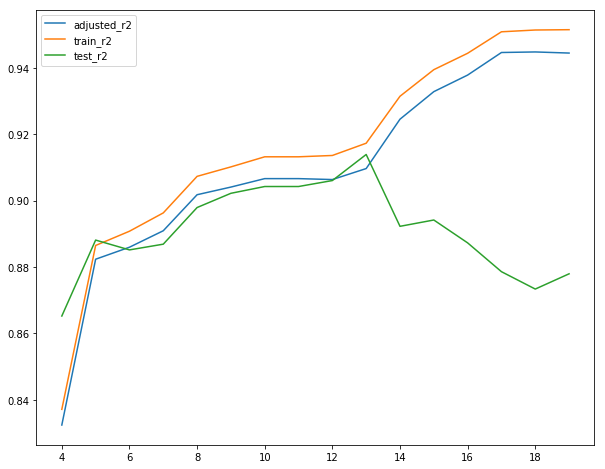

In [229]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

In [230]:
# RFE with n features
lm = LinearRegression()

n_features = 6

# specify number of features
rfe_n = RFE(lm, n_features)

# fit with n features
rfe_n.fit(X_train, y_train)

# subset the features selected by rfe_6
col_n = X_train.columns[rfe_n.support_]

# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]

# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)


# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)


# making predictions using rfe_15 sm model
X_test_rfe_n = X_test[col_n]


# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

test_r2.append(r2_score(y_test, y_pred))

In [231]:
# summary
lm_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     184.8
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           7.79e-63
Time:                        18:19:29   Log-Likelihood:                -1325.8
No. Observations:                 143   AIC:                             2666.
Df Residuals:                     136   BIC:                             2686.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.339e+04    221.912     60.350      0.000     1.3e+04    1.38e+04
carwidth             2022.5954    467.095      4.330      0.000    1098.886    2946.305
curbweight           2280.5711    582.682      3.914      0.000    1128.283    3432.860
enginesize           2455.4132    470.374      5.220      0.000    1525.219    3385.607
carname_Bmw          1755.2549    222.194      7.900      0.000    1315.853    2194.657
carname_Porsche       707.8462    306.321      2.311      0.022     102.077    1313.615
enginelocation_rear  1526.3407    406.639      3.754      0.000     722.187    2330.495
==============================================================================
Omnibus:                        8.829   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.273
Skew:                           0.478   Prob(JB):                      0.00969
Kurtosis:                       3.801   Cond. No.                         5.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
# results 
r2_score(y_test, y_pred)

0.8851422877312569

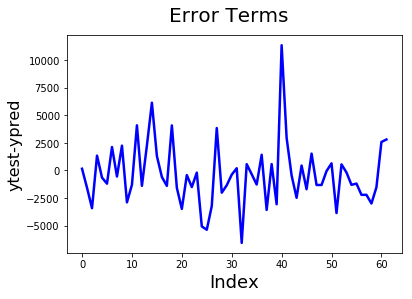

In [233]:
# Error terms
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

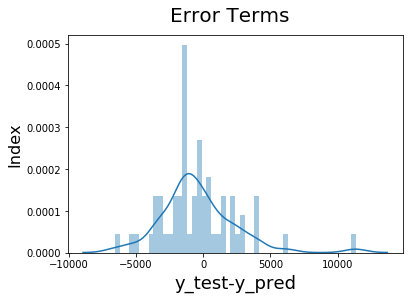

In [234]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [235]:
# mean
np.mean(y_test-y_pred)


-382.73632450276426

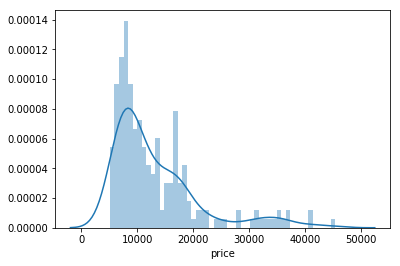

In [236]:
sns.distplot(cars['price'],bins=50)
plt.show()

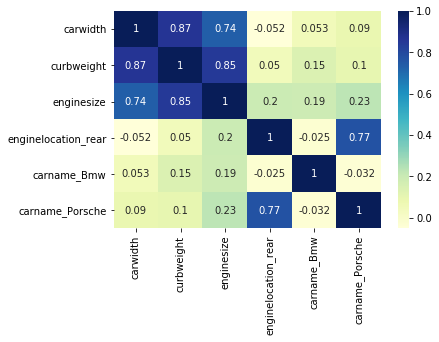

In [240]:
# multicollinearity
predictors = ['carwidth', 'curbweight', 'enginesize', 
             'enginelocation_rear', 'carname_Bmw', 'carname_Porsche']

cors = X.loc[:, list(predictors)].corr()
sns.heatmap(cors,cmap="YlGnBu",annot=True)
plt.show()

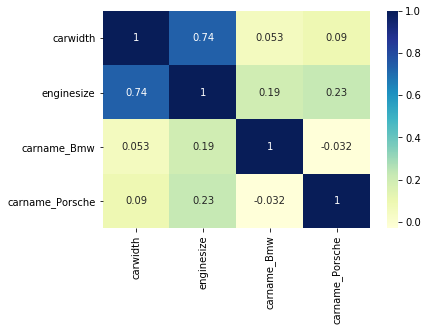

In [270]:
# multicollinearity
predictors = ['carwidth','enginesize','carname_Bmw',
               'carname_Porsche']

cors = X.loc[:, list(predictors)].corr()
sns.heatmap(cors,cmap="YlGnBu",annot=True)
plt.show()

In [271]:
# subset the features selected by rfe_6
col_n = predictors
# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]

# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)


# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)


# making predictions using rfe_15 sm model
X_test_rfe_n = X_test[col_n]


# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

test_r2.append(r2_score(y_test, y_pred))

In [272]:
# summary
lm_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     220.7
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           6.64e-59
Time:                        18:50:38   Log-Likelihood:                -1341.0
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     138   BIC:                             2707.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.333e+04    243.913     54.660      0.000    1.29e+04    1.38e+04
carwidth         2851.3463    364.114      7.831      0.000    2131.382    3571.310
enginesize       3965.4549    394.271     10.058      0.000    3185.862    4745.048
carname_Bmw      1735.8074    244.983      7.085      0.000    1251.401    2220.214
carname_Porsche  1161.3847    268.885      4.319      0.000     629.717    1693.052
==============================================================================
Omnibus:                       13.427   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.278
Skew:                           0.734   Prob(JB):                     0.000793
Kurtosis:                       3.493   Cond. No.                         2.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
# results 
r2_score(y_test, y_pred)

0.8569147350787375